In [1]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
from sklearn.model_selection import train_test_split

train, test, labels_train, labels_test = train_test_split(iris.data, iris.target,
                                                          train_size=0.70, test_size=0.30,
                                                          random_state=2022)
categorical_features = np.argwhere(
    np.array([len(set(iris.data[:, x])) for x in range(iris.data.shape[1])]) <= 10).flatten()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = RandomForestClassifier(random_state=2022)
lr.fit(train, labels_train)

RandomForestClassifier(random_state=2022)

In [5]:
pred_origin = lr.predict_proba(test)
pred_origin = np.argmax(pred_origin, axis=1)

In [6]:
import sys
sys.path.append('..')
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=iris.feature_names,
                                                   categorical_features=categorical_features, verbose=False,
                                                   mode='classification', random_state=2022)

[('1.30 < petal width (cm) <= 1.80', 1.6846474671169265), ('4.40 < petal length (cm) <= 5.10', 0.6679414163047505), ('sepal width (cm) <= 2.80', -0.46634727295072903), ('5.80 < sepal length (cm) <= 6.50', 0.20058310625557826)]
[0.20058310625557826, -0.46634727295072903, 0.6679414163047505, 1.6846474671169265]
['5.80 < sepal length (cm) <= 6.50', 'sepal width (cm) <= 2.80', '4.40 < petal length (cm) <= 5.10', '1.30 < petal width (cm) <= 1.80']


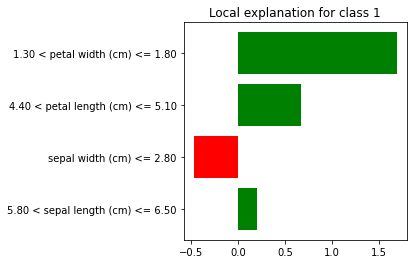

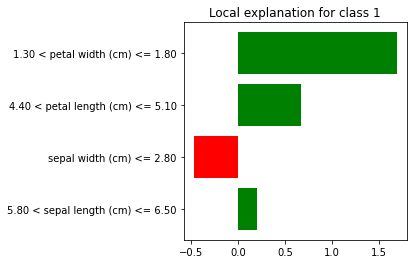

In [7]:
exp = explainer.explain_instance(test[25], lr.predict_proba, num_features=4, labels=(0, 1, 2))
exp.as_pyplot_figure(label=1)

In [8]:
import tqdm as td
pred_lime = []
for i in td.tqdm(test):
    exp = explainer.explain_instance(i, lr.predict_proba, num_features=4, labels=(0, 1, 2))
    # print(exp.local_pred)
    pred_lime.append([exp.local_pred[0].tolist()[0], exp.local_pred[1].tolist()[0], exp.local_pred[2].tolist()[0]])

100%|██████████| 45/45 [00:25<00:00,  1.74it/s]


In [9]:
pred_lime = np.argmax(pred_lime, axis=1)
pred_lime

array([2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0,
       2], dtype=int64)

In [10]:
from sklearn.metrics import classification_report

print('\nClassification Report:\n', classification_report(labels_test, pred_origin, digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        14
           1     0.8824    1.0000    0.9375        15
           2     1.0000    0.8750    0.9333        16

    accuracy                         0.9556        45
   macro avg     0.9608    0.9583    0.9569        45
weighted avg     0.9608    0.9556    0.9555        45



In [11]:
print('\nClassification Report:\n', classification_report(labels_test, pred_lime, digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     0.8125    0.9286    0.8667        14
           1     0.8333    1.0000    0.9091        15
           2     1.0000    0.6875    0.8148        16

    accuracy                         0.8667        45
   macro avg     0.8819    0.8720    0.8635        45
weighted avg     0.8861    0.8667    0.8624        45



In [12]:
print('\nClassification Report:\n', classification_report(pred_origin, pred_lime, digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     0.8125    0.9286    0.8667        14
           1     0.9444    1.0000    0.9714        17
           2     1.0000    0.7857    0.8800        14

    accuracy                         0.9111        45
   macro avg     0.9190    0.9048    0.9060        45
weighted avg     0.9207    0.9111    0.9104        45

